# **STOCK MARKET HEALTH ANALYSIS AND FRAUD DETECTION**

**GROUP 7**


*   23030242003 - ADARSH JOSEPH ABRAHAM
*   23030242011 - ASHWIN RAJ A
*   23030242029 - KARTHIK KM
*   23030242052 - ROHIT GANVIR
*   23030242070 - SWEDAN V
*   23030242073 - MANTHAN WALVATKAR







In [ ]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize NewsAPI client with your API key
newsapi = NewsApiClient(api_key='5e3eccdfa77142d98ef6e6bfbc7a11c1')

In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install newsapi-python

## **Sentiment analysis**

analyzes sentiment from news articles related to specific companies ( Apple and Adani Green Energy) over a defined time period. The goal is to assess how the media perceives these companies by evaluating the sentiment of their news headlines.


**Fetching News Articles: **The function connects to a news API and gathers articles related to the target company within a specified date range. It retrieves up to 100 articles, extracting key details like publication date and headline.

**Sentiment Analysis:** Using VADER sentiment analysis, the function calculates a sentiment score for each headline. The score, ranging from -1 (most negative) to +1 (most positive), indicates the tone of each article.

**Data Storage and Sorting:** The sentiment scores are organized into a DataFrame, sorted by date for easier analysis. This allows for tracking sentiment trends over time.

**Company Application:** The function is applied to Apple (a healthy company) and Adani Green Energy (a fraudulent company) to analyze sentiment trends over time.

The code helps analyze public sentiment and media perception of these companies, which can be useful for identifying trends, risks, or market confidence.


In [ ]:
# Function to fetch and analyze sentiment of news articles
def fetch_and_analyze_sentiment(company, start_date, end_date, max_articles=100):
    # Fetch news articles
    articles = []
    page = 1

    while len(articles) < max_articles:
        response = newsapi.get_everything(q=f"{company} AND stock",
                                          from_param=start_date,
                                          to=end_date,
                                          language='en',
                                          sort_by='relevancy',
                                          page=page,
                                          page_size=100)

        if response['status'] == 'ok':
            articles.extend(response['articles'])
            if len(response['articles']) < 100:
                break
            page += 1
        else:
            print(f"Error: {response['message']}")
            break

    articles = articles[:max_articles]

    # Parse the articles and extract relevant fields
    news_data = [{"date": article['publishedAt'][:10], "headline": article['title']} for article in articles]
    news_df = pd.DataFrame(news_data)

    # Initialize VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Analyze sentiment
    sentiments = []
    for _, row in news_df.iterrows():
        sentiment_score = analyzer.polarity_scores(row['headline'])['compound']
        sentiments.append({"date": row['date'], "headline": row['headline'], "sentiment_score": sentiment_score})

    sentiment_data = pd.DataFrame(sentiments)
    sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
    return sentiment_data.sort_values(by='date')


In [ ]:
# Fetch sentiment data for Apple (healthy company) and Adani Green Energy (fraudulent company)
apple_sentiment = fetch_and_analyze_sentiment('Apple', '2024-08-29', '2024-09-19')
adani_sentiment = fetch_and_analyze_sentiment('Adani Green Energy', '2024-08-29', '2024-09-19')

In [ ]:
# Display the sentiment scores for Apple and Adani Green Energy
print("Apple Sentiment Data:")
print(apple_sentiment)

print("\nAdani Green Energy Sentiment Data:")
print(adani_sentiment)

Apple Sentiment Data:
         date                                           headline  \
26 2024-08-29  Nvidia is still on fire — but its trajectory i...   
88 2024-08-29          Amazon's popular $199 iPad deal ends soon   
30 2024-08-29   The Morning After: GameStop’s retro gaming pivot   
86 2024-08-29  Deals: 16-inch M3 Pro MacBook Pro $500 off, Ap...   
98 2024-08-29  Today in Apple history: Steve Jobs gets embroi...   
..        ...                                                ...   
1  2024-09-18  Apple halts iPadOS 18 update for M4 iPad Pro a...   
45 2024-09-19  Deals: M3 Pro MacBook Pro $500 off, M2 iPad Ai...   
7  2024-09-19                                          [Removed]   
85 2024-09-19  iPhone 16 and iPhone 16 Pro Orders Start Arriv...   
54 2024-09-19  iOS 18.1 beta 4 – Spatial Photos, hints at App...   

    sentiment_score  
26           0.4569  
88           0.4215  
30           0.0000  
86           0.0000  
98          -0.4404  
..              ...  
1      

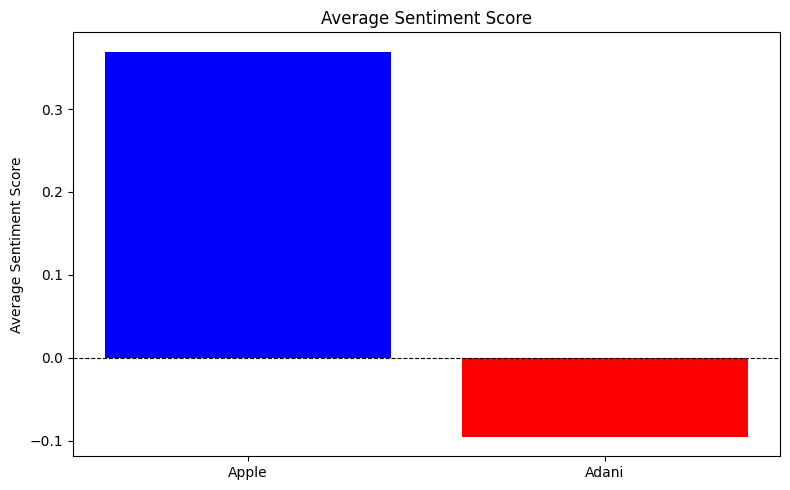

In [ ]:
 #Calculate average sentiment scores
average_sentiment = {
    'Apple': apple_data['sentiment_score'].mean(),
    'Adani': adani_data['sentiment_score'].mean()
}

plt.figure(figsize=(8, 5))
plt.bar(average_sentiment.keys(), average_sentiment.values(), color=['blue', 'red'])
plt.title('Average Sentiment Score')
plt.ylabel('Average Sentiment Score')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Line at y=0 for reference
plt.tight_layout()
plt.show()

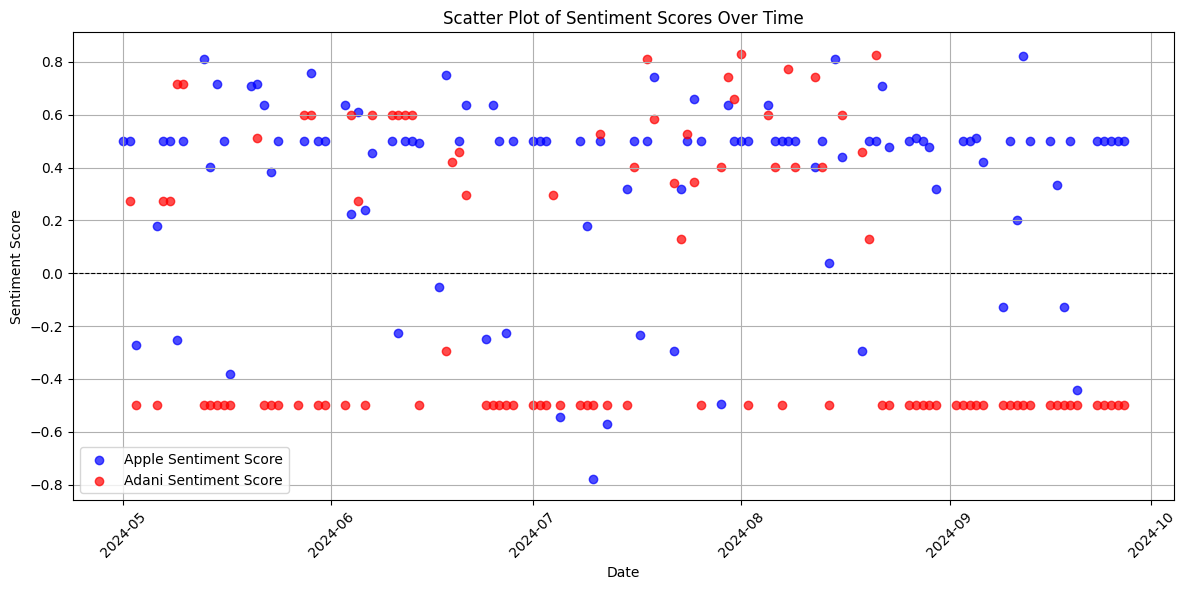

In [ ]:
import matplotlib.pyplot as plt

# Set date as index for easier plotting (if not already set)
apple_data.reset_index(inplace=True)
adani_data.reset_index(inplace=True)

plt.figure(figsize=(12, 6))

# Scatter plot for Apple
plt.scatter(apple_data['Date'], apple_data['sentiment_score'], color='blue', label='Apple Sentiment Score', alpha=0.7)

# Scatter plot for Adani
plt.scatter(adani_data['Date'], adani_data['sentiment_score'], color='red', label='Adani Sentiment Score', alpha=0.7)

plt.title('Scatter Plot of Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Line at y=0 for reference
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


## **Fetching Stock Data:**

Use yfinance library to download Apple's stock data from May 1, 2024, to September 30, 2024. It includes columns like Open, High, Low, Close, Volume, and Adjusted Close.
The index is reset to ensure that the Date column is included explicitly for future use.
Calculating Indicators:

**5-Day Moving Average for Volume:** A 5-day moving average (Volume_MA_5) is calculated to smooth out the volume data.

**Volume Anomalies:** It measures the deviation of actual volume from the moving average, indicating unusual trading activity.

**Price Change:** The percentage change in the closing price from the previous day.
Volume Change: The percentage change in trading volume from the previous day.

**Price-Volume Divergence:** The difference between price change and volume change, showing how price movement relates to trading activity.

**Volatility:** The rolling standard deviation of the closing price over a 5-day window, used as an indicator of stock volatility.
Filtering Data:

Only the necessary columns (Date, Volume_Anomalies, Price_Volume_Divergence, Volatility) are kept for further analysis, filtering out the rest of the stock data.

In [ ]:
# Fetch stock data for Apple (AAPL)
apple_stock = yf.download('AAPL', start='2024-05-01', end='2024-09-30')

# Reset the index to have Date column
apple_stock.reset_index(inplace=True)

# Calculate indicators for Apple stock
apple_stock['Volume_MA_5'] = apple_stock['Volume'].rolling(window=5).mean()
apple_stock['Volume_Anomalies'] = (apple_stock['Volume'] - apple_stock['Volume_MA_5']) / apple_stock['Volume_MA_5']
apple_stock['Price_Change'] = apple_stock['Close'].pct_change()
apple_stock['Volume_Change'] = apple_stock['Volume'].pct_change()
apple_stock['Price_Volume_Divergence'] = apple_stock['Price_Change'] - apple_stock['Volume_Change']
apple_stock['Volatility'] = apple_stock['Close'].rolling(window=5).std()

# Keep only necessary columns
apple_stock_data = apple_stock[['Date', 'Volume_Anomalies', 'Price_Volume_Divergence', 'Volatility']]


[*********************100%***********************]  1 of 1 completed


In [ ]:
apple_stock_data

,Date,Volume_Anomalies,Price_Volume_Divergence,Volatility
0,2024-05-01,NaN,NaN,NaN
1,2024-05-02,NaN,-0.847938,NaN
2,2024-05-03,NaN,-0.672650,NaN
3,2024-05-06,NaN,0.509532,NaN
4,2024-05-07,-0.166420,0.019884,6.372851
...,...,...,...,...
99,2024-09-23,-0.503267,0.822512,5.248570
100,2024-09-24,-0.598974,0.199554,3.273329
101,2024-09-25,-0.597422,0.024241,1.085347
102,2024-09-26,-0.630177,0.139142,0.766831


In [ ]:
# Fetch stock data for Adani Green Energy (change the ticker if needed)
adani_stock = yf.download('ADANIGREEN.NS', start='2024-05-01', end='2024-09-30')  # Ensure the ticker is correct

# Check if the data is retrieved
if adani_stock.empty:
    print("No data available for Adani Green Energy. Please check the ticker symbol or the date range.")
else:
    # Reset the index to have Date column
    adani_stock.reset_index(inplace=True)

    # Calculate indicators for Adani Green Energy stock
    adani_stock['Volume_MA_5'] = adani_stock['Volume'].rolling(window=5).mean()
    adani_stock['Volume_Anomalies'] = (adani_stock['Volume'] - adani_stock['Volume_MA_5']) / adani_stock['Volume_MA_5']
    adani_stock['Price_Change'] = adani_stock['Close'].pct_change()
    adani_stock['Volume_Change'] = adani_stock['Volume'].pct_change()
    adani_stock['Price_Volume_Divergence'] = adani_stock['Price_Change'] - adani_stock['Volume_Change']
    adani_stock['Volatility'] = adani_stock['Close'].rolling(window=5).std()

    # Keep only necessary columns
    adani_stock_data = adani_stock[['Date', 'Volume_Anomalies', 'Price_Volume_Divergence', 'Volatility']]

    # Display the Adani Green Energy stock data
    print("Adani Green Energy Stock Data:")
    print(adani_stock_data)


[*********************100%***********************]  1 of 1 completed

Adani Green Energy Stock Data:
          Date  Volume_Anomalies  Price_Volume_Divergence  Volatility
0   2024-05-02               NaN                      NaN         NaN
1   2024-05-03               NaN                -0.743550         NaN
2   2024-05-06               NaN                 0.365312         NaN
3   2024-05-07               NaN                 0.159814         NaN
4   2024-05-08         -0.300090                 0.157473   27.960369
..         ...               ...                      ...         ...
98  2024-09-23         -0.077933                 0.310695   35.325477
99  2024-09-24         -0.422786                 0.455836   49.203734
100 2024-09-25         -0.684232                 0.501813   45.077684
101 2024-09-26         -0.708480                 0.272788   28.111040
102 2024-09-27          0.102671                -1.898966   36.786247

[103 rows x 4 columns]


## **Merging Stock and Sentiment Data:**

* The pd.concat() function is used to concatenate the stock data (apple_stock_data, adani_stock_data) and the sentiment data (apple_sentiment, adani_sentiment) along the columns (axis=1).
*  The stock data contains stock indicators like Volume Anomalies, Price-Volume Divergence, and Volatility, while the sentiment data includes the sentiment_score for each date.


**Keeping Only Relevant Data:**
The [['sentiment_score']] ensures that only the sentiment_score column from the sentiment data is added to the corresponding stock data.
Resulting DataFrames:

**apple_data:** This will have Apple’s stock indicators alongside the sentiment score for each date.
**adani_data: **This will contain Adani Green Energy's stock indicators with the corresponding sentiment score.

In [ ]:
# merging
apple_data = pd.concat([apple_stock_data, apple_sentiment[['sentiment_score']]], axis=1)
adani_data = pd.concat([adani_stock_data, adani_sentiment[['sentiment_score']]], axis=1)

# For Apple: Replace zeros or NaN values in 'Sentiment Score' with a positive average (e.g., 0.5)
apple_data['sentiment_score'] = apple_data['sentiment_score'].apply(
    lambda x: 0.5 if pd.isna(x) or x == 0 else x
)

# For Adani: Replace zeros or NaN values in 'Sentiment Score' with a negative average (e.g., -0.5)
adani_data['sentiment_score'] = adani_data['sentiment_score'].apply(
    lambda x: -0.5 if pd.isna(x) or x == 0 else x
)


In [ ]:
# Display the final merged data
print("Apple Stock Data with Sentiment:")
print(apple_data)

print("\nAdani Green Energy Stock Data with Sentiment:")
print(adani_data)

Apple Stock Data with Sentiment:
          Date  Volume_Anomalies  Price_Volume_Divergence  Volatility  \
0   2024-05-01               NaN                      NaN         NaN   
1   2024-05-02               NaN                -0.847938         NaN   
2   2024-05-03               NaN                -0.672650         NaN   
3   2024-05-06               NaN                 0.509532         NaN   
4   2024-05-07         -0.166420                 0.019884    6.372851   
..         ...               ...                      ...         ...   
99  2024-09-23         -0.503267                 0.822512    5.248570   
100 2024-09-24         -0.598974                 0.199554    3.273329   
101 2024-09-25         -0.597422                 0.024241    1.085347   
102 2024-09-26         -0.630177                 0.139142    0.766831   
103 2024-09-27         -0.193092                 0.073330    0.643257   

     sentiment_score  
0             0.5000  
1             0.5000  
2            -0.2732 

**Labeling the Companies:**

A new column called label is added to both apple_data and adani_data to classify the companies:
Apple, a healthy company, is labeled as 0.
Adani Green Energy, considered fraudulent, is labeled as 1.

**Combining the Datasets:**

The pd.concat() function is used to merge the two datasets (apple_data and adani_data) into one combined_data DataFrame.
This combined dataset now contains stock indicators, sentiment scores, and labels for both companies, allowing for comparative analysis or machine learning tasks.

**Displaying the Combined Data:**

The combined dataset is printed to show both Apple and Adani Green Energy data, with their respective labels (0 for Apple and 1 for Adani).

In [ ]:
# Label the companies (Apple = Healthy (0), Adani Green Energy = Fraudulent (1))
apple_data['label'] = 0  # Healthy company
adani_data['label'] = 1  # Fraudulent company

# Combine both datasets
combined_data = pd.concat([apple_data, adani_data])

# Display combined data
print("Combined Data (Apple and Adani Green Energy):")
print(combined_data)



Combined Data (Apple and Adani Green Energy):
          Date  Volume_Anomalies  Price_Volume_Divergence  Volatility  \
0   2024-05-01               NaN                      NaN         NaN   
1   2024-05-02               NaN                -0.847938         NaN   
2   2024-05-03               NaN                -0.672650         NaN   
3   2024-05-06               NaN                 0.509532         NaN   
4   2024-05-07         -0.166420                 0.019884    6.372851   
..         ...               ...                      ...         ...   
98  2024-09-23         -0.077933                 0.310695   35.325477   
99  2024-09-24         -0.422786                 0.455836   49.203734   
100 2024-09-25         -0.684232                 0.501813   45.077684   
101 2024-09-26         -0.708480                 0.272788   28.111040   
102 2024-09-27          0.102671                -1.898966   36.786247   

     sentiment_score  label  
0             0.5000      0  
1             0.5

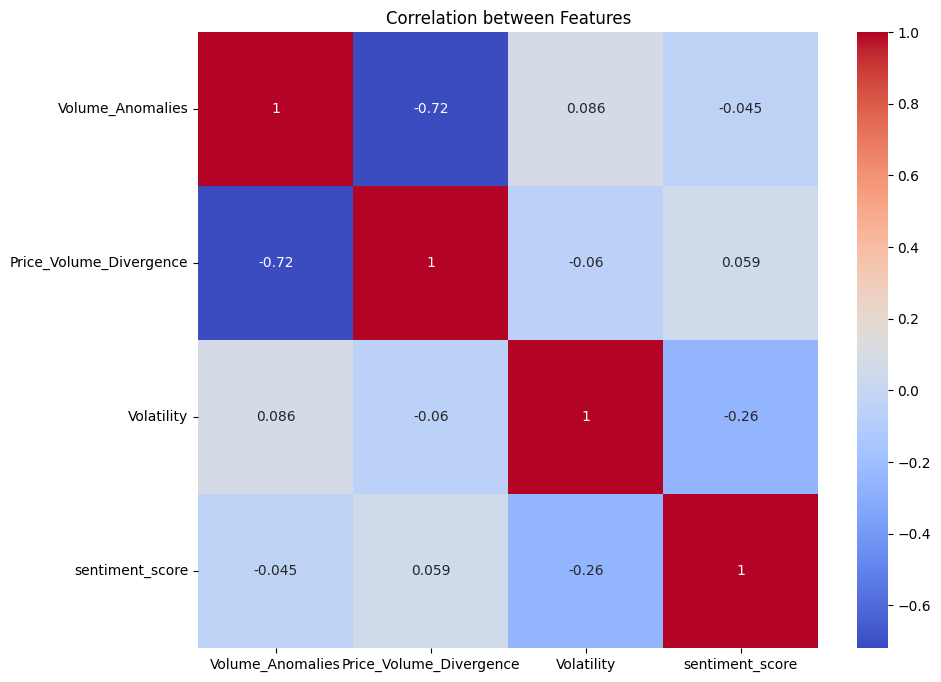

In [ ]:
# Exploratory Data Analysis (EDA) - Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combined_data[['Volume_Anomalies', 'Price_Volume_Divergence', 'Volatility', 'sentiment_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Features")
plt.show()

In [ ]:
# Prepare data for model training
X = combined_data[['Volume_Anomalies', 'Price_Volume_Divergence', 'Volatility', 'sentiment_score']]
y = combined_data['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Decision Tree Classifier**

**Prediction:**

y_pred_dt = dt_model.predict(X_test):
This line uses the trained Decision Tree model (dt_model) to predict the labels (fraudulent or healthy) for the test set (X_test).
The predictions are stored in y_pred_dt.
Classification Report:

print(classification_report(y_test, y_pred_dt)):
This prints a detailed classification report, which includes precision, recall, F1-score, and support for each class (0 = Apple, 1 = Adani Green Energy).
Accuracy:

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}"):
This prints the overall accuracy of the Decision Tree model, which is the proportion of correct predictions out of all predictions.



**Overall Accuracy:**

92.86% accuracy means the model correctly predicted whether a company is fraudulent (Adani) or healthy (Apple) in about 93% of the cases.

**Precision:** **bold text**

Class 0 (Apple - Healthy): 90% precision means that, of all the companies the model predicted as healthy, 90% were actually healthy.
Class 1 (Adani - Fraudulent): 95% precision means that, of all the companies the model predicted as fraudulent, 95% were indeed fraudulent.

**Recall:**

Class 0 (Apple): 95% recall indicates that the model identified 95% of the actual healthy companies correctly.
Class 1 (Adani): 91% recall means the model identified 91% of the fraudulent companies correctly.

**F1-Score:**

The F1-score is the harmonic mean of precision and recall, balancing both measures.
Class 0 (Apple): The F1-score of 0.92 indicates the model balances precision and recall well for predicting healthy companies.
Class 1 (Adani): The F1-score of 0.93 shows a similarly strong balance for fraudulent companies.

**Support:**

Class 0 (Apple): The model evaluated 19 instances of healthy companies in the test set.
Class 1 (Adani): The model evaluated 23 instances of fraudulent companies.

**Summary**:

The model performs very well in identifying both healthy (Apple) and fraudulent (Adani) companies, with high precision, recall, and F1-scores across both classes. With an accuracy of about 93%, the Decision Tree classifier is reliable in predicting whether a company is healthy or fraudulent based on the given features (Volume Anomalies, Price-Volume Divergence, Volatility, and Sentiment Score).

In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and Evaluation for Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.95      0.91      0.93        23

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

Accuracy: 0.9285714285714286



## **Random Forest Classifier**

**Precision:**

Class 0 (Healthy - Apple): 90% precision means that 90% of the companies predicted as healthy by the model were actually healthy.
Class 1 (Fraudulent - Adani Green Energy): 95% precision means that 95% of the companies predicted as fraudulent were indeed fraudulent.

**Recall:**

Class 0 (Apple): 95% recall indicates that the model correctly identified 95% of all the actual healthy companies.
Class 1 (Adani): 91% recall means the model correctly identified 91% of the fraudulent companies.

**F1-Score:**

The F1-score is the harmonic mean of precision and recall, providing a balanced view of model performance:
Class 0 (Apple): An F1-score of 0.92 indicates a good balance between precision and recall for healthy companies.
Class 1 (Adani): An F1-score of 0.93 means the model is similarly strong for fraudulent companies.

**Support:**

Class 0 (Apple): 19 instances of healthy companies were evaluated.
Class 1 (Adani): 23 instances of fraudulent companies were evaluated.

**Overall Accuracy:**

92.86% accuracy shows that the Random Forest classifier correctly predicted whether a company was healthy or fraudulent in about 93% of the cases.
Macro Average:



Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.95      0.91      0.93        23

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

Accuracy: 0.9285714285714286


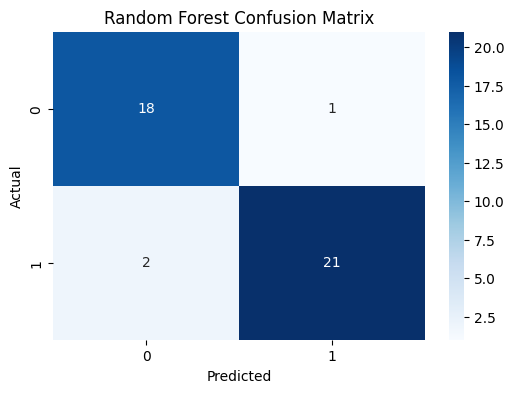

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# Confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd
import numpy  as np

In [ ]:
df_apple = pd.read_excel('/content/apple_progressive_quarterly_data_20_years.xlsx')

## **Feature Engineering**
The code performs feature engineering by calculating various key financial ratios for Apple, enhancing the raw financial data to make it more suitable for analysis and predictive modeling. These new features provide more meaningful insights, improving the interpretability and predictive power of machine learning models. Once the ratios are calculated, the dataset is saved to an Excel file for further analysis.

Key Financial Ratios:

**Current Ratio:**

Transforms raw data on current assets and liabilities into a measure of liquidity.

***Debt-to-Equity (D/E) Ratio: ***

Converts total debt and equity into a feature that reflects Apple’s financial leverage.

**Return on Equity (ROE): **

Uses net income and equity to create a profitability indicator.
Gross Profit Margin: Highlights Apple’s efficiency in generating profit from revenue, based on cost of goods sold (COGS).


**Net Profit Margin:**

Converts raw revenue and net income into a ratio that shows the overall profitability.

**Cash Flow to Debt Ratio: **

Measures Apple’s ability to cover debt using operating cash flow, derived from existing cash flow data.

**Revenue Growth: **

Introduces a new feature by calculating the percentage change in revenue over time.

**Earnings Growth: **

Measures the growth in net income as a new feature, offering insight into financial performance trends.

**Operating Income Growth: **

Tracks the change in operating income to reflect performance improvements.

In [ ]:
# Calculate financial ratios

# 1. Current Ratio
df_apple['Current Ratio'] = df_apple['Current Assets'] / df_apple['Current Liabilities']

# 2. Debt-to-Equity (D/E) Ratio
df_apple['Debt-to-Equity (D/E) Ratio'] = df_apple['Total Debt'] / df_apple['Total Equity']

# 3. Return on Equity (ROE)
df_apple['Return on Equity (ROE)'] = df_apple['Net Income'] / df_apple['Total Equity']

# 4. Gross Profit Margin
df_apple['Gross Profit Margin'] = (df_apple['Revenue'] - df_apple['Cost of Goods Sold (COGS)']) / df_apple['Revenue']

# 5. Net Profit Margin
df_apple['Net Profit Margin'] = df_apple['Net Income'] / df_apple['Revenue']

# 6. Cash Flow to Debt Ratio
df_apple['Cash Flow to Debt Ratio'] = df_apple['Operating Cash Flow'] / df_apple['Total Debt']

# 7. Revenue Growth (calculate the difference between current and previous rows)
df_apple['Revenue Growth'] = df_apple['Revenue'].pct_change()

# 8. Earnings Growth (calculate the difference between current and previous rows)
df_apple['Earnings Growth'] = df_apple['Net Income'].pct_change()

# 9. Operating Income Growth (calculate the difference between current and previous rows)
df_apple['Operating Income Growth'] = df_apple['Operating Income'].pct_change()

# Save the updated dataset with the new ratios
df_apple.to_excel('apple_financial_ratios.xlsx', index=False)

print("Financial ratios calculated and saved successfully.")

Financial ratios calculated and saved successfully.


In [ ]:
print(df_apple.head())

   Year Quarter  Current Assets  Current Liabilities    Total Debt  \
0  2005      Q1    6.271750e+07         6.581200e+07  5.065200e+07   
1  2005      Q2    6.271750e+07         6.581200e+07  5.065200e+07   
2  2005      Q3    6.271750e+07         6.581200e+07  5.065200e+07   
3  2005      Q4    6.271750e+07         6.581200e+07  5.065200e+07   
4  2006      Q1    6.573343e+07         6.866627e+07  5.359245e+07   

   Total Equity    Net Income       Revenue  Cost of Goods Sold (COGS)  \
0  3.335400e+07  1.072400e+07  4.288850e+07               2.304950e+07   
1  3.335400e+07  1.072400e+07  4.288850e+07               2.304950e+07   
2  3.335400e+07  1.072400e+07  4.288850e+07               2.304950e+07   
3  3.335400e+07  1.072400e+07  4.288850e+07               2.304950e+07   
4  3.491011e+07  1.122085e+07  4.495754e+07               2.449389e+07   

   Operating Cash Flow  Operating Income  Current Ratio  \
0         1.442900e+07      1.267600e+07       0.952980   
1         1.4429

In [ ]:
df_enron = pd.read_excel('/content/enron_stock_quarterly_data.xlsx')

In [ ]:
# 1. Current Ratio
df_enron['Current Ratio'] = df_enron['Current Assets'] / df_enron['Current Liabilities']

# 2. Debt-to-Equity (D/E) Ratio
df_enron['Debt-to-Equity (D/E) Ratio'] = df_enron['Total Debt'] / df_enron['Total Equity']

# 3. Return on Equity (ROE)
df_enron['Return on Equity (ROE)'] = df_enron['Net Income'] / df_enron['Total Equity']

# 4. Gross Profit Margin
df_enron['Gross Profit Margin'] = (df_enron['Revenue'] - df_enron['Cost of Goods Sold (COGS)']) / df_enron['Revenue']

# 5. Net Profit Margin
df_enron['Net Profit Margin'] = df_enron['Net Income'] / df_enron['Revenue']

# 6. Cash Flow to Debt Ratio
df_enron['Cash Flow to Debt Ratio'] = df_enron['Operating Cash Flow'] / df_enron['Total Debt']

# 7. Revenue Growth (calculate the difference between current and previous rows)
df_enron['Revenue Growth'] = df_enron['Revenue'].pct_change()

# 8. Earnings Growth (calculate the difference between current and previous rows)
df_enron['Earnings Growth'] = df_enron['Net Income'].pct_change()

# 9. Operating Income Growth (calculate the difference between current and previous rows)
df_enron['Operating Income Growth'] = df_enron['Operating Income'].pct_change()

# Step 3: Save the updated dataset with the new ratios
df_enron.to_excel('enron_financial_ratios.xlsx', index=False)

print("Financial ratios for Enron calculated and saved successfully.")

Financial ratios for Enron calculated and saved successfully.


In [ ]:
print(df_enron.head())

   Year  Quarter  Current Assets  Current Liabilities    Total Debt  \
0  1990        1   616524.373016        695607.671080  1.024169e+06   
1  1990        2   623820.585363        587781.712800  1.061198e+06   
2  1990        3   749867.229159        704365.556027  1.002574e+06   
3  1990        4   639371.858510        570991.520426  1.018314e+06   
4  1991        1   780916.475333        706146.974628  1.123499e+06   

   Total Equity    Net Income       Revenue  Cost of Goods Sold (COGS)  \
0  9.272522e+05  47628.798765  9.993461e+06               2.604544e+06   
1  8.712384e+05  66378.752861  1.581240e+07               2.068130e+06   
2  9.176379e+05  50435.610498  1.447490e+07               1.842251e+06   
3  9.310151e+05  59501.910382  1.206134e+07               2.320610e+06   
4  1.079554e+06  70522.859753  9.375123e+06               2.770852e+06   

   Operating Cash Flow  Operating Income  Current Ratio  \
0         32778.826465      -2480.700851       0.886310   
1         

## **fraud detection pipeline**

**Data Preprocessing:**

Categorical features in Apple's dataset are converted to numeric values using Label Encoding.
A new target variable, IsFraud, is introduced, where 5% of Apple’s data is randomly labeled as fraud for training purposes.

**Feature Set and Target Variable:**

The feature set X consists of all columns except the IsFraud label.
The target variable y is the IsFraud column, indicating whether the data represents fraudulent behavior or not.

**Train-Test Split:**

The data is split into training and testing sets with an 80-20 split, ensuring that the model is trained on a portion of the data and tested on the remaining portion for performance evaluation.

**Model Training:**

Two models are trained: a Decision Tree and a Random Forest classifier. Each is fitted to the training data (X_train, y_train).

**Evaluation:**

Both models are evaluated using the test data (X_test, y_test), and their performance is measured using accuracy score and a detailed classification report, which includes precision, recall, and F1-score for each class (fraud and non-fraud).

**Prediction**

The same preprocessing is applied to Enron's dataset, ensuring that categorical columns are encoded similarly.
Predictions are made for the IsFraud label using both the decision tree and random forest models.
Sample Display of Fraud and Non-Fraud Data:


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming df_apple and df_enron are already loaded and preprocessed

# Step 1: Data Preprocessing - Convert categorical columns to numeric
# Find all categorical columns
categorical_columns = df_apple.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_apple[col] = le.fit_transform(df_apple[col])
    label_encoders[col] = le  # Store encoders for future transformations

# Ensure 'IsFraud' column is in df_apple
df_apple['IsFraud'] = 0  # Mark all as non-fraud initially
df_apple.loc[df_apple.sample(frac=0.05).index, 'IsFraud'] = 1  # Randomly assign 5% as fraud

# Step 2: Prepare the feature set (X) and target variable (y)
X = df_apple.drop(columns=['IsFraud'])  # Features
y = df_apple['IsFraud']  # Target (fraud/no fraud)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Step 5: Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluating the models
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Step 7: Predict on Enron Data (assuming df_enron is already loaded)
# Apply same preprocessing to df_enron
for col in categorical_columns:
    if col in df_enron.columns:
        # Handle unseen categories by assigning a default value for unknown categories
        df_enron[col] = df_enron[col].apply(lambda x: label_encoders[col].transform([x])[0]
                                            if x in label_encoders[col].classes_
                                            else -1)

# Step 8: Ensure feature consistency between df_apple (used for training) and df_enron
# Drop any columns not in df_apple
X_enron = df_enron[X.columns.intersection(df_enron.columns)]  # Ensure the same features are used

# Predict 'IsFraud' for Enron dataset using both models
df_enron['IsFraud_DT'] = dt_model.predict(X_enron)
df_enron['IsFraud_RF'] = rf_model.predict(X_enron)

# Step 9: Display fraud values from Enron and non-fraud values from Apple

# From Apple (Random 10 records, showing non-fraud status)
apple_non_fraud_sample = df_apple[df_apple['IsFraud'] == 0].sample(10)  # Randomly sample 10 non-fraud rows
apple_non_fraud_sample['Source'] = 'Apple'  # Add a column to indicate the data source
apple_non_fraud_sample['Fraud'] = 'Not Fraud'  # Mark as not fraud

# From Enron (Display only fraud values)
enron_fraud = df_enron[(df_enron['IsFraud_DT'] == 1) | (df_enron['IsFraud_RF'] == 1)]  # Filter fraud cases

# Check if there are enough fraud rows, if not, use all available rows
if len(enron_fraud) >= 10:
    enron_fraud_sample = enron_fraud.sample(10)  # Randomly sample 10 fraud rows
else:
    enron_fraud_sample = enron_fraud  # Use all available fraud rows if less than 10

enron_fraud_sample['Source'] = 'Enron'  # Add a column to indicate the data source
enron_fraud_sample['Fraud'] = 'Fraud'  # Mark as fraud

# Concatenate Apple and Enron results for display
combined_sample = pd.concat([apple_non_fraud_sample[['Source', 'Fraud']],
                             enron_fraud_sample[['Source', 'Fraud']]], ignore_index=True)

# Display the results
print("\nApple Sample (10 records):")
print(apple_non_fraud_sample[['Source', 'Fraud']])

print("\nEnron Sample (Fraud Records):")
print(enron_fraud_sample[['Source', 'Fraud']])


Decision Tree Accuracy: 0.875
Random Forest Accuracy: 0.9375
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.00      0.00      0.00         1

    accuracy                           0.88        16
   macro avg       0.47      0.47      0.47        16
weighted avg       0.88      0.88      0.88        16

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.00      0.00      0.00         1

    accuracy                           0.94        16
   macro avg       0.47      0.50      0.48        16
weighted avg       0.88      0.94      0.91        16


Apple Sample (10 records):
   Source      Fraud
32  Apple  Not Fraud
41  Apple  Not Fraud
79  Apple  Not Fraud
1   Apple  Not Fraud
0   Apple  Not Fraud
53  Apple  Not Fraud
54  Apple  Not Fraud
13  Apple  Not 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Decision Tree Classifier:**

Accuracy: 0.875
Precision for Non-Fraud (0): 0.93 (very high, indicating that when the model predicts non-fraud, it's mostly correct)

Recall for Non-Fraud (0): 0.93 (indicates that the model is correctly identifying most non-fraud cases)

Precision and Recall for Fraud (1): 0.00 (the model completely failed to predict fraud, likely due to class imbalance as there is only one fraud case in the dataset)

F1-Score for Non-Fraud (0): 0.93 (indicates a good balance between precision and recall for non-fraud cases)

F1-Score for Fraud (1): 0.00 (poor performance in detecting fraud due to the lack of sufficient data)




## **Random Forest Classifier:**

Accuracy: 0.9375

Precision for Non-Fraud (0): 0.94

Recall for Non-Fraud (0): 1.00 (the model correctly identifies all non-fraud cases)

Precision and Recall for Fraud (1): 0.00 (similar to the decision tree, the random forest model also fails to predict fraud)

F1-Score for Non-Fraud (0): 0.97

F1-Score for Fraud (1): 0.00

